In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df1 = pd.read_csv('deliveries.csv')
df1.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

In [3]:
df2 = pd.read_csv('matches.csv')
df2.head()

id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2 umpire3  
0     AY Dandekar       NJ Llong     NaN  
1  A Nand Kishore         S Ravi     NaN  
2     Nitin Menon      CK Nandan     NaN  
3    AK Chaudhary  C Shamshuddin     NaN  
4             NaN            NaN     NaN

In [4]:
match1 = df2[((df2['team1'] == 'Rajasthan Royals') & ((df2['team2'] == 'Delhi Daredevils') | (df2['team2'] == 'Delhi Capitals')))]
match2 = df2[(((df2['team1'] == 'Delhi Daredevils') | (df2['team1'] == 'Delhi Capitals')) & (df2['team2'] == 'Rajasthan Royals'))]

Match1 = Rajasthan Home Ground

Match2 = Delhi Home Ground

# Overall Delhi vs Rajasthan:

In [6]:
match = pd.concat((match1,match2))
match.head()

id  season       city        date             team1             team2  \
61    62    2008      Delhi  2008-04-19  Rajasthan Royals  Delhi Daredevils   
114  115    2008     Mumbai  2008-05-30  Rajasthan Royals  Delhi Daredevils   
179  180    2010  Ahmedabad  2010-03-15  Rajasthan Royals  Delhi Daredevils   
348  349    2012     Jaipur  2012-05-01  Rajasthan Royals  Delhi Daredevils   
384  385    2013      Delhi  2013-04-06  Rajasthan Royals  Delhi Daredevils   

          toss_winner toss_decision  result  dl_applied            winner  \
61   Rajasthan Royals           bat  normal           0  Delhi Daredevils   
114  Delhi Daredevils         field  normal           0  Rajasthan Royals   
179  Delhi Daredevils         field  normal           0  Delhi Daredevils   
348  Rajasthan Royals           bat  normal           0  Delhi Daredevils   
384  Rajasthan Royals           bat  normal           0  Rajasthan Royals   

     win_by_runs  win_by_wickets player_of_match  \
61             0               9     MF Maharoof   
114          105               0       SR Watson   
179            0               6        V Sehwag   
348            0               6          P Negi   
384            5               0        R Dravid   

                            venue     umpire1         umpire2 umpire3  
61               Feroz Shah Kotla   Aleem Dar  GA Pratapkumar     NaN  
114              Wankhede Stadium   BF Bowden     RE Koertzen     NaN  
179  Sardar Patel Stadium, Motera  BG Jerling     RE Koertzen     NaN  
348        Sawai Mansingh Stadium   JD Cloete      SJA Taufel     NaN  
384              Feroz Shah Kotla       S Das   C Shamshuddin     NaN

Matches played between Delhi and Rajasthan

In [7]:
match.shape

(20, 18)

In [8]:
match['winner'].value_counts()

Rajasthan Royals    11
Delhi Daredevils     7
Delhi Capitals       2
Name: winner, dtype: int64

In [9]:
match['winner'].value_counts().plot.bar()
plt.show()

Rajasthan won 11 times and Delhi won 9 times against each other.

In [10]:
match['toss_winner'].value_counts()

Delhi Daredevils    11
Rajasthan Royals     8
Delhi Capitals       1
Name: toss_winner, dtype: int64

In [11]:
match['toss_decision'].value_counts()

bat      10
field    10
Name: toss_decision, dtype: int64

In [12]:
match[match['toss_winner'] == match['winner']]['winner'].value_counts()

Delhi Daredevils    4
Rajasthan Royals    4
Delhi Capitals      1
Name: winner, dtype: int64

In [13]:
match[match['toss_winner'] == match['winner']]['winner'].value_counts().plot.bar()
plt.show()

Rajasthan won the toss and won the match 4 times, whereas Delhi won 5 times.

In [24]:
ids = list(match['id'])
ids1 = list(match2['id'])
delivery = df1[(df1['match_id'] == ids[0]) | (df1['match_id'] == ids[1]) | (df1['match_id'] == ids[2]) | (df1['match_id'] == ids[3]) | (df1['match_id'] == ids[4]) | (df1['match_id'] == ids[5]) | (df1['match_id'] == ids[6]) | (df1['match_id'] == ids[7]) | (df1['match_id'] == ids[8]) | (df1['match_id'] == ids[9]) | (df1['match_id'] == ids[10]) | (df1['match_id'] == ids[11]) | (df1['match_id'] == ids[12]) | (df1['match_id'] == ids[13]) | (df1['match_id'] == ids[14]) | (df1['match_id'] == ids[15]) | (df1['match_id'] == ids[16]) | (df1['match_id'] == ids[17]) | (df1['match_id'] == ids[18]) | (df1['match_id'] == ids[19])] 
delivery.head()

match_id  inning      batting_team      bowling_team  over  ball  \
14335        62       1  Rajasthan Royals  Delhi Daredevils     1     1   
14336        62       1  Rajasthan Royals  Delhi Daredevils     1     2   
14337        62       1  Rajasthan Royals  Delhi Daredevils     1     3   
14338        62       1  Rajasthan Royals  Delhi Daredevils     1     4   
14339        62       1  Rajasthan Royals  Delhi Daredevils     1     5   

       batsman non_striker      bowler  is_super_over  ...  bye_runs  \
14335  T Kohli   YK Pathan  GD McGrath              0  ...         0   
14336  T Kohli   YK Pathan  GD McGrath              0  ...         0   
14337  T Kohli   YK Pathan  GD McGrath              0  ...         0   
14338  T Kohli   YK Pathan  GD McGrath              0  ...         0   
14339  T Kohli   YK Pathan  GD McGrath              0  ...         0   

       legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
14335            0            0             0             0           0   
14336            0            0             0             0           0   
14337            0            0             0             0           0   
14338            0            0             0             0           1   
14339            0            0             0             0           0   

       total_runs  player_dismissed dismissal_kind fielder  
14335           0               NaN            NaN     NaN  
14336           0               NaN            NaN     NaN  
14337           0               NaN            NaN     NaN  
14338           1               NaN            NaN     NaN  
14339           0               NaN            NaN     NaN  

[5 rows x 21 columns]

Getting the details ball by ball of the matches played between Delhi and Rajasthan.

## Delhi scores in powerplay against Rajasthan:

In [25]:
total_powerplay_runs_Delhi = delivery[((delivery['over'] == 1) | (delivery['over'] == 2) | (delivery['over'] == 3) | (delivery['over'] == 4) | (delivery['over'] == 5) | (delivery['over'] == 6)) & ((delivery['batting_team'] == 'Delhi Daredevils') | (delivery['batting_team'] == 'Delhi Capitals'))]['total_runs'].sum()
total_powerplay_runs_Delhi

953

Delhi scored 953 runs in powerplay against Rajasthan till now.

In [26]:
avg_powerplay_runs_Delhi = math.ceil(total_powerplay_runs_Delhi/len(ids))
avg_powerplay_runs_Delhi

48

Delhi scored 48 runs in an average in a powerplay against Rajasthan.

In [27]:
total_powerplay_runs_Delhi_batting_first = delivery[((delivery['over'] == 1) | (delivery['over'] == 2) | (delivery['over'] == 3) | (delivery['over'] == 4) | (delivery['over'] == 5) | (delivery['over'] == 6)) & ((delivery['batting_team'] == 'Delhi Daredevils') | (delivery['batting_team'] == 'Delhi Capitals')) & (delivery['inning'] == 1)]['total_runs'].sum()
total_powerplay_runs_Delhi_batting_first

449

Delhi scored 449 runs in powerplay against Rajasthan batting first.

In [29]:
total_matches_Delhi_batting_first = len(delivery[(delivery['inning'] == 1) & ((delivery['batting_team'] == 'Delhi Daredevils') | (delivery['batting_team'] == 'Delhi Capitals'))]['match_id'].value_counts())
total_matches_Delhi_batting_first

10

Delhi played 10 matches against Rajasthan while batting first.

In [31]:
avg_powerplay_runs_Delhi_batting_first = math.ceil(total_powerplay_runs_Delhi_batting_first/total_matches_Delhi_batting_first)
avg_powerplay_runs_Delhi_batting_first

45

Delhi scored 45 runs in an average in a powerplay against Rajasthan while batting first.

In [32]:
total_powerplay_runs_Delhi_batting_second = delivery[((delivery['over'] == 1) | (delivery['over'] == 2) | (delivery['over'] == 3) | (delivery['over'] == 4) | (delivery['over'] == 5) | (delivery['over'] == 6)) & ((delivery['batting_team'] == 'Delhi Daredevils') | (delivery['batting_team'] == 'Delhi Capitals')) & (delivery['inning'] == 2)]['total_runs'].sum()
total_powerplay_runs_Delhi_batting_second

504

Delhi scored 504 runs in powerplay against Rajasthan batting second.

In [33]:
total_matches_Delhi_batting_second = len(delivery[(delivery['inning'] == 2) & ((delivery['batting_team'] == 'Delhi Daredevils') | (delivery['batting_team'] == 'Delhi Capitals'))]['match_id'].value_counts())
total_matches_Delhi_batting_second

10

Delhi played 10 matches against Rajasthan while batting second.

In [34]:
avg_powerplay_runs_Delhi_batting_second = math.ceil(total_powerplay_runs_Delhi_batting_second/total_matches_Delhi_batting_second)
avg_powerplay_runs_Delhi_batting_second

51

Delhi scored 51 runs in an average in a powerplay against Rajasthan while batting second.

In [35]:
average_runs_powerplay_Delhi = pd.Series([avg_powerplay_runs_Delhi,avg_powerplay_runs_Delhi_batting_first,avg_powerplay_runs_Delhi_batting_second],index=['Total','Batting First','Batting Second'])
sns.barplot(x=average_runs_powerplay_Delhi.index,y=average_runs_powerplay_Delhi)
plt.title('Average runs in powerplay by Delhi')
plt.show()

So Delhi scored more runs in powerplay while batting second against Rajasthan.

## Steve Smith playing for Rajasthan:

In [36]:
total_run_Steve_Smith_rr = delivery[delivery['batsman'] == 'SPD Smith']['batsman_runs'].sum()
total_run_Steve_Smith_rr

61

Steve Smith for Rajasthan scored only 61 runs against Delhi.

In [38]:
total_matches_against_Delhi_for_Rajasthan = len(delivery[delivery['batsman'] == 'SPD Smith']['match_id'].value_counts())
total_matches_against_Delhi_for_Rajasthan

2

Total matches played for rajasthan and against Delhi.

In [39]:
avg_run_Steve_Smith_rr = math.ceil(total_run_Steve_Smith_rr/total_matches_against_Delhi_for_Rajasthan)
avg_run_Steve_Smith_rr

31

Steve Smith scored an average of 31 per match for Rajasthan against Delhi.

In [40]:
total_run_Steve_Smith_batting_first_rr = delivery[(delivery['batsman'] == 'SPD Smith') & (delivery['inning']==1)]['batsman_runs'].sum()
total_run_Steve_Smith_batting_first_rr

51

Steve Smith scored 51 runs while batting in first inning.

In [41]:
total_matches_against_Delhi_for_Rajasthan_first_inning = len(delivery[(delivery['batsman'] == 'SPD Smith') & (delivery['inning'] == 1)]['match_id'].value_counts())
total_matches_against_Delhi_for_Rajasthan_first_inning

1

1. Steve Smith played only one inning for Rajasthan against Delhi while batting first.
2. So his average run is also 51 while batting first.

In [42]:
total_run_Steve_Smith_batting_second_rr = delivery[(delivery['batsman'] == 'SPD Smith') & (delivery['inning']==2)]['batsman_runs'].sum()
total_run_Steve_Smith_batting_second_rr

10

Steve Smith scored only 10 runs while batting in second inning against Delhi.

In [43]:
total_matches_against_Delhi_for_Rajasthan_second_inning = len(delivery[(delivery['batsman'] == 'SPD Smith') & (delivery['inning'] == 2)]['match_id'].value_counts())
total_matches_against_Delhi_for_Rajasthan_second_inning

1

1. Steve Smith played only one inning for Rajasthan against Delhi while batting second.
2. So his average run is also 10 while batting second.

In [44]:
average_runs_rr = pd.Series([avg_run_Steve_Smith_rr,total_run_Steve_Smith_batting_first_rr,total_run_Steve_Smith_batting_second_rr],index=['Total','Batting First','Batting Second'])
sns.barplot(x=average_runs_rr.index,y=average_runs_rr)
plt.title('Average run by Steve Smith at Rajasthan Royals')
plt.show()

1. So he scored more runs in the first innings for Rajasthan against Delhi.
2. But he played only 2 matches against Delhi so it'll be hard to predict his runs today with this data.

## Steve Smith Overall:

In [45]:
total_run_Steve_Smith = df1[(df1['batsman'] == 'SPD Smith') & ((df1['bowling_team'] == 'Delhi Daredevils') | (df1['bowling_team'] == 'Delhi Capitals'))]['batsman_runs'].sum()
total_run_Steve_Smith

150

Steve Smith overall scored 150 runs against Delhi.

In [46]:
total_matches_against_Delhi = len(df1[(df1['batsman'] == 'SPD Smith') & ((df1['bowling_team'] == 'Delhi Daredevils') | (df1['bowling_team'] == 'Delhi Capitals'))]['match_id'].value_counts())
total_matches_against_Delhi

5

Total matches played against Delhi.

In [47]:
avg_run_Steve_Smith = math.ceil(total_run_Steve_Smith/total_matches_against_Delhi)
avg_run_Steve_Smith

30

30 runs per match in an average.

In [48]:
total_run_Steve_Smith_batting_first = df1[(df1['batsman'] == 'SPD Smith') & (df1['inning']==1) & ((df1['bowling_team'] == 'Delhi Daredevils') | (df1['bowling_team'] == 'Delhi Capitals'))]['batsman_runs'].sum()
total_run_Steve_Smith_batting_first

85

Steve Smith scored 85 runs while batting in first inning against Delhi.

In [49]:
total_matches_against_Delhi_first_inning = len(df1[(df1['batsman'] == 'SPD Smith') & (df1['inning'] == 1) & ((df1['bowling_team'] == 'Delhi Daredevils') | (df1['bowling_team'] == 'Delhi Capitals'))]['match_id'].value_counts())
total_matches_against_Delhi_first_inning

2

Total innings played against Delhi batting first.

In [50]:
avg_run_Steve_Smith_batting_first = math.ceil(total_run_Steve_Smith_batting_first/total_matches_against_Delhi_first_inning)
avg_run_Steve_Smith_batting_first

43

43 runs per match in an average batting first.

In [51]:
total_run_Steve_Smith_batting_second = df1[(df1['batsman'] == 'SPD Smith') & (df1['inning']==2) & ((df1['bowling_team'] == 'Delhi Daredevils') | (df1['bowling_team'] == 'Delhi Capitals'))]['batsman_runs'].sum()
total_run_Steve_Smith_batting_second

65

Steve Smith scored 65 runs while batting in second inning against Delhi.

In [52]:
total_matches_against_Delhi_second_inning = len(df1[(df1['batsman'] == 'SPD Smith') & (df1['inning'] == 2) & ((df1['bowling_team'] == 'Delhi Daredevils') | (df1['bowling_team'] == 'Delhi Capitals'))]['match_id'].value_counts())
total_matches_against_Delhi_second_inning

3

Total innings played against Delhi batting second.

In [53]:
avg_run_Steve_Smith_batting_second = math.ceil(total_run_Steve_Smith_batting_second/total_matches_against_Delhi_second_inning)
avg_run_Steve_Smith_batting_second

22

22 runs per match in an average batting second.

In [54]:
average_runs = pd.Series([avg_run_Steve_Smith,avg_run_Steve_Smith_batting_first,avg_run_Steve_Smith_batting_second],index=['Total','Batting First','Batting Second'])
sns.barplot(x=average_runs.index,y=average_runs)
plt.title('Average run by Steve Smith Overall')
plt.show()

So we can see Steve Smith played better in the 1st inning played against Delhi.

## Wide Balls:

In [55]:
total_wides = delivery['wide_runs'].sum()
total_wides

167

Total 167 wide balls bowled.

In [56]:
wides_by_Delhi = delivery[((delivery['bowling_team'] == 'Delhi Daredevils') | (delivery['bowling_team'] == 'Delhi Capitals'))]['wide_runs'].sum()
wides_by_Delhi

87

Delhi bowled 87 wides against Rajasthan.

In [58]:
wides_by_Rajasthan = delivery[delivery['bowling_team'] == 'Rajasthan Royals']['wide_runs'].sum()
wides_by_Rajasthan

80

Rajasthan bowled 80 wides against Delhi.

In [59]:
avg_wides = math.ceil(total_wides/len(ids))
avg_wides

9

Average wides per match is 9.

In [60]:
wides = pd.Series([total_wides,wides_by_Delhi,wides_by_Rajasthan],index=['Total','Delhi','Rajasthan'])
sns.barplot(x=wides.index,y=wides)
plt.title('Wide Balls')
plt.show()

So Delhi bowled more wide balls than Rajasthan.

## Total Wickets fallen in a match:

In [61]:
total_wickets_fallen = delivery['player_dismissed'].count()
total_wickets_fallen

225

Total 225 wickets fallen in Delhi vs Rajasthan match till now.

In [62]:
avg_wicket_fallen = math.ceil(total_wickets_fallen/len(ids))
avg_wicket_fallen

12

Total 12 wickets fallen in an average in a match between Delhi and Rajasthan.

In [63]:
total_wickets_fallen_Delhi = delivery[(delivery['bowling_team'] == 'Rajasthan Royals')]['player_dismissed'].count()
total_wickets_fallen_Delhi

107

Total 107 wickets fallen of Delhi against Rajasthan till now.

In [64]:
avg_wicket_fallen_Delhi = math.ceil(total_wickets_fallen_Delhi/len(ids))
avg_wicket_fallen_Delhi

6

Delhi lost 6 wickets in an average per match against Rajasthan.

In [65]:
total_wickets_fallen_Rajasthan = delivery[(delivery['batting_team'] == 'Rajasthan Royals')]['player_dismissed'].count()
total_wickets_fallen_Rajasthan

118

Total 118 wickets fallen of Rajasthan against Delhi till now.

In [66]:
avg_wicket_fallen_Rajasthan = math.ceil(total_wickets_fallen_Rajasthan/len(ids))
avg_wicket_fallen_Rajasthan

6

Rajasthan lost 6 wickets in an average per match against Delhi.

In [67]:
total_wickets_fallen_Delhi_batting_first = delivery[(delivery['bowling_team'] == 'Rajasthan Royals') & (delivery['inning'] == 1)]['player_dismissed'].count()
total_wickets_fallen_Delhi_batting_first

53

Delhi lost 53 wickets against Rajasthan while batting first.

In [69]:
avg_wicket_fallen_batting_first_Delhi = math.ceil(total_wickets_fallen_Delhi_batting_first/10)
avg_wicket_fallen_batting_first_Delhi

6

Delhi lost 6 wickets in an average per match against Rajasthan while batting in first inning.

In [70]:
total_wickets_fallen_Delhi_batting_second = delivery[(delivery['bowling_team'] == 'Rajasthan Royals') & (delivery['inning'] == 2)]['player_dismissed'].count()
total_wickets_fallen_Delhi_batting_second

54

Delhi lost 54 wickets against Rajasthan while batting second.

In [71]:
avg_wicket_fallen_batting_second_Delhi = math.ceil(total_wickets_fallen_Delhi_batting_second/10)
avg_wicket_fallen_batting_second_Delhi

6

Delhi lost 6 wickets in an average per match against Rajasthan while batting in second inning.

In [72]:
total_wickets_fallen_Rajasthan_batting_first = delivery[(delivery['batting_team'] == 'Rajasthan Royals') & (delivery['inning'] == 1)]['player_dismissed'].count()
total_wickets_fallen_Rajasthan_batting_first

64

Rajasthan lost 64 wickets against Delhi while batting first.

In [73]:
avg_wicket_fallen_batting_first_Rajasthan = math.ceil(total_wickets_fallen_Rajasthan_batting_first/10)
avg_wicket_fallen_batting_first_Rajasthan

7

Rajasthan lost 7 wickets in an average per match against Delhi while batting in first inning.

In [74]:
total_wickets_fallen_Rajasthan_batting_second = delivery[(delivery['batting_team'] == 'Rajasthan Royals') & (delivery['inning'] == 2)]['player_dismissed'].count()
total_wickets_fallen_Rajasthan_batting_second

54

Rajasthan lost 54 wickets against Delhi while batting second.

In [75]:
avg_wicket_fallen_batting_second_Rajasthan = math.ceil(total_wickets_fallen_Rajasthan_batting_second/10)
avg_wicket_fallen_batting_second_Rajasthan

6

Rajasthan lost 6 wickets in an average per match against Delhi while batting in second inning.

In [77]:
avg_wickets_per_match = pd.Series([avg_wicket_fallen,avg_wicket_fallen_Delhi,avg_wicket_fallen_Rajasthan],index=['Total','Delhi','Rajasthan'])
sns.barplot(x=avg_wickets_per_match.index,y=avg_wickets_per_match)
plt.title('Average Wicket fallen of Delhi and Rajasthan')
plt.show()

Both lost 6 wickets in an avearge in a match.

# Delhi Home Ground:

In [78]:
match2.shape

(10, 18)

In [79]:
match2['winner'].value_counts()

Rajasthan Royals    6
Delhi Daredevils    4
Name: winner, dtype: int64

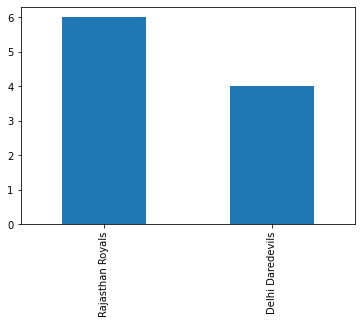

In [80]:
match2['winner'].value_counts().plot.bar()
plt.show()

Rajasthan won 6 times and Delhi won 4 times against each other at Delhi home ground.

In [81]:
match2['toss_winner'].value_counts()

Delhi Daredevils    6
Rajasthan Royals    4
Name: toss_winner, dtype: int64

In [82]:
match2['toss_decision'].value_counts()

bat      6
field    4
Name: toss_decision, dtype: int64

In [83]:
match2[match2['toss_winner'] == match2['winner']]['winner'].value_counts()

Delhi Daredevils    3
Rajasthan Royals    3
Name: winner, dtype: int64

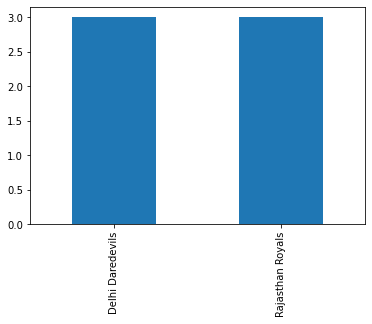

In [84]:
match2[match2['toss_winner'] == match2['winner']]['winner'].value_counts().plot.bar()
plt.show()

Both win toss and win the match 3 times at Delhi home ground.

In [85]:
delivery1 = df1[(df1['match_id'] == ids[0]) | (df1['match_id'] == ids[1]) | (df1['match_id'] == ids[2]) | (df1['match_id'] == ids[3]) | (df1['match_id'] == ids[4]) | (df1['match_id'] == ids[5]) | (df1['match_id'] == ids[6]) | (df1['match_id'] == ids[7]) | (df1['match_id'] == ids[8]) | (df1['match_id'] == ids[9])] 
delivery1.head()

match_id  inning      batting_team      bowling_team  over  ball  \
14335        62       1  Rajasthan Royals  Delhi Daredevils     1     1   
14336        62       1  Rajasthan Royals  Delhi Daredevils     1     2   
14337        62       1  Rajasthan Royals  Delhi Daredevils     1     3   
14338        62       1  Rajasthan Royals  Delhi Daredevils     1     4   
14339        62       1  Rajasthan Royals  Delhi Daredevils     1     5   

       batsman non_striker      bowler  is_super_over  ...  bye_runs  \
14335  T Kohli   YK Pathan  GD McGrath              0  ...         0   
14336  T Kohli   YK Pathan  GD McGrath              0  ...         0   
14337  T Kohli   YK Pathan  GD McGrath              0  ...         0   
14338  T Kohli   YK Pathan  GD McGrath              0  ...         0   
14339  T Kohli   YK Pathan  GD McGrath              0  ...         0   

       legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
14335            0            0             0             0           0   
14336            0            0             0             0           0   
14337            0            0             0             0           0   
14338            0            0             0             0           1   
14339            0            0             0             0           0   

       total_runs  player_dismissed dismissal_kind fielder  
14335           0               NaN            NaN     NaN  
14336           0               NaN            NaN     NaN  
14337           0               NaN            NaN     NaN  
14338           1               NaN            NaN     NaN  
14339           0               NaN            NaN     NaN  

[5 rows x 21 columns]

Getting the details ball by ball of the matches played between Delhi and Rajasthan at Delhi home ground.

## Delhi scores in powerplay against Rajasthan at Delhi home ground:

In [87]:
total_powerplay_runs_Delhi_Delhi_home_ground = delivery1[((delivery1['over'] == 1) | (delivery1['over'] == 2) | (delivery1['over'] == 3) | (delivery1['over'] == 4) | (delivery1['over'] == 5) | (delivery1['over'] == 6)) & ((delivery1['batting_team'] == 'Delhi Daredevils') | (delivery1['batting_team'] == 'Delhi Capitals'))]['total_runs'].sum()
total_powerplay_runs_Delhi_Delhi_home_ground

504

Delhi scored 504 runs in powerplay against Rajasthan at Delhi home ground.

In [88]:
avg_powerplay_runs_Delhi_Delhi_home_ground = math.ceil(total_powerplay_runs_Delhi_Delhi_home_ground/len(ids1))
avg_powerplay_runs_Delhi_Delhi_home_ground

51

Delhi scored 51 runs in an average in a powerplay against Rajasthan at Delhi home ground.

In [89]:
total_powerplay_runs_Delhi_batting_first_Delhi_home_ground = delivery1[((delivery1['over'] == 1) | (delivery1['over'] == 2) | (delivery1['over'] == 3) | (delivery1['over'] == 4) | (delivery1['over'] == 5) | (delivery1['over'] == 6)) & ((delivery1['batting_team'] == 'Delhi Daredevils') | (delivery1['batting_team'] == 'Delhi Capitals')) & (delivery1['inning'] == 1)]['total_runs'].sum()
total_powerplay_runs_Delhi_batting_first_Delhi_home_ground

0

1. Delhi didn't bat in the first inning at Delhi home ground.
2. Delhi average powerplay score at Delhi home ground is also 51.

## Wide Balls at Delhi home ground:

In [92]:
total_wides_Delhi_home_ground = delivery1['wide_runs'].sum()
total_wides_Delhi_home_ground

89

Total 89 wide balls bowled at Delhi home ground.

In [93]:
wides_by_Delhi_Delhi_home_ground = delivery1[((delivery1['bowling_team'] == 'Delhi Daredevils') | (delivery1['bowling_team'] == 'Delhi Capitals'))]['wide_runs'].sum()
wides_by_Delhi_Delhi_home_ground

44

Delhi bowled 44 wides against Rajasthan at Delhi home ground.

In [94]:
wides_by_Rajasthan_Delhi_home_ground = delivery1[delivery1['bowling_team'] == 'Rajasthan Royals']['wide_runs'].sum()
wides_by_Rajasthan_Delhi_home_ground

45

Rajasthan bowled 45 wides against Delhi at Delhi home ground.

In [95]:
avg_wides_Delhi_home_ground = math.ceil(total_wides_Delhi_home_ground/len(ids1))
avg_wides_Delhi_home_ground

9

Average wides per match is 9 at Delhi home ground.

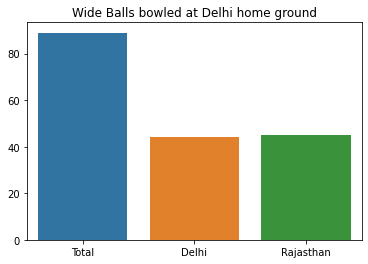

In [97]:
wides_delhi_home_ground = pd.Series([total_wides_Delhi_home_ground,wides_by_Delhi_Delhi_home_ground,wides_by_Rajasthan_Delhi_home_ground],index=['Total','Delhi','Rajasthan'])
sns.barplot(x=wides_delhi_home_ground.index,y=wides_delhi_home_ground)
plt.title('Wide Balls bowled at Delhi home ground')
plt.show()

So both bowled more or less same number of wide balls at Delhi home ground.

## Total Wickets fallen in a match at Delhi home ground:

In [98]:
total_wickets_fallen_Delhi_home_ground = delivery1['player_dismissed'].count()
total_wickets_fallen_Delhi_home_ground

118

Total 118 wickets fallen in Delhi vs Rajasthan match till now at Delhi home ground.

In [99]:
avg_wicket_fallen_Delhi_home_ground = math.ceil(total_wickets_fallen_Delhi_home_ground/len(ids1))
avg_wicket_fallen_Delhi_home_ground

12

Total 12 wickets fallen in an average in a match between Delhi and Rajasthan at Delhi home ground.

In [100]:
total_wickets_fallen_Delhi_Delhi_home_ground = delivery1[(delivery1['bowling_team'] == 'Rajasthan Royals')]['player_dismissed'].count()
total_wickets_fallen_Delhi_Delhi_home_ground

54

Total 54 wickets fallen of Delhi against Rajasthan till now at Delhi home ground.

In [101]:
avg_wicket_fallen_Delhi_Delhi_home_ground = math.ceil(total_wickets_fallen_Delhi_Delhi_home_ground/len(ids1))
avg_wicket_fallen_Delhi_Delhi_home_ground

6

Delhi lost 6 wickets in an average per match against Rajasthan at Delhi home ground.

In [102]:
total_wickets_fallen_Rajasthan_Delhi_home_ground = delivery1[(delivery1['batting_team'] == 'Rajasthan Royals')]['player_dismissed'].count()
total_wickets_fallen_Rajasthan_Delhi_home_ground

64

Total 64 wickets fallen of Rajasthan against Delhi till now at Delhi home ground.

In [103]:
avg_wicket_fallen_Rajasthan_Delhi_home_ground = math.ceil(total_wickets_fallen_Rajasthan_Delhi_home_ground/len(ids1))
avg_wicket_fallen_Rajasthan_Delhi_home_ground

7

Rajasthan lost 7 wickets in an average per match against Delhi at Delhi home ground.

In [104]:
total_wickets_fallen_Delhi_batting_first_Delhi_home_ground = delivery1[(delivery1['bowling_team'] == 'Rajasthan Royals') & (delivery1['inning'] == 1)]['player_dismissed'].count()
total_wickets_fallen_Delhi_batting_first_Delhi_home_ground

0

Delhi didn't bat in the first inning at Delhi home ground against Rajasthan.

In [105]:
total_wickets_fallen_Rajasthan_batting_first_Delhi_home_ground = delivery1[(delivery1['batting_team'] == 'Rajasthan Royals') & (delivery1['inning'] == 1)]['player_dismissed'].count()
total_wickets_fallen_Rajasthan_batting_first_Delhi_home_ground

64

Rajasthan lost 64 wickets against Delhi while batting first at Delhi home ground.

In [106]:
avg_wicket_fallen_batting_first_Rajasthan_Delhi_home_ground = math.ceil(total_wickets_fallen_Rajasthan_batting_first_Delhi_home_ground/10)
avg_wicket_fallen_batting_first_Rajasthan_Delhi_home_ground

7

Rajasthan lost 7 wickets in an average per match against Delhi while batting in first inning at Delhi home ground.

In [107]:
total_wickets_fallen_Rajasthan_batting_second_Delhi_home_ground = delivery1[(delivery1['batting_team'] == 'Rajasthan Royals') & (delivery1['inning'] == 2)]['player_dismissed'].count()
total_wickets_fallen_Rajasthan_batting_second_Delhi_home_ground

0

Rajasthan didn't bat in the second inning against Delhi at Delhi home ground.

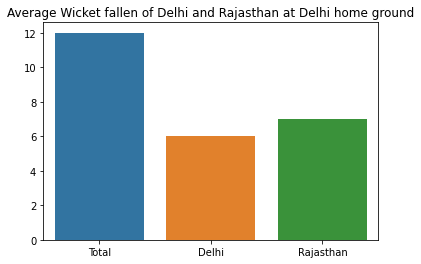

In [108]:
avg_wickets_per_match_delhi_home_ground = pd.Series([avg_wicket_fallen,avg_wicket_fallen_Delhi_Delhi_home_ground,avg_wicket_fallen_Rajasthan_Delhi_home_ground],index=['Total','Delhi','Rajasthan'])
sns.barplot(x=avg_wickets_per_match_delhi_home_ground.index,y=avg_wickets_per_match_delhi_home_ground)
plt.title('Average Wicket fallen of Delhi and Rajasthan at Delhi home ground')
plt.show()

Rajasthan lost more wickets in an avearge in a match at Delhi home ground.